Data Provenance and Why I chose it:

I have chosen to take data from past March Madness Tournaments (2008 to 2024*, with no tournament occuring in 2008 due to Covid-19). I obtained this data from Kaggle user Nishaan Amin at the link below. He compiled this data directly from the KenPom, BartTorvik and ESPN websites. 

I wanted to use this data because it provides a holistic view of teams' most important performance metrics coming into March Madness, as well as their ultimate results in the tournament. I think that creating my app with this data will allow me to create a user-friendly experience that details what to look for in future teams that could or could not be successful in March Madness.

*The 2024 data is predicted data from the user, as opposed to being sourced from the aforementioned websites. As such, this data is later dropped, and only data from 2008-2023 (excluding 2020) is used.

In [1]:
# import dependencies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read in data
# Data is from https://www.kaggle.com/datasets/nishaanamin/march-madness-data/data?select=KenPom+Barttorvik.csv

data = pd.read_csv(r"C:\Users\ceero\Downloads\KenPom Barttorvik.csv")

# preview data
data.head()

,YEAR,CONF,CONF ID,QUAD NO,QUAD ID,TEAM NO,TEAM ID,TEAM,SEED,ROUND,...,BADJT RANK,AVG HGT RANK,EFF HGT RANK,EXP RANK,TALENT RANK,FT% RANK,OP FT% RANK,PPPO RANK,PPPD RANK,ELITE SOS RANK
0,2024,MAC,17,61,1,1079,2,Akron,14,0,...,297,247,199,19,177,183,60,113,56,225
1,2024,SEC,28,61,1,1078,3,Alabama,3,0,...,14,34,8,160,110,8,212,1,232,3
2,2024,SB,26,61,1,1077,7,Appalachian St.,13,0,...,208,214,102,140,143,315,32,88,13,286
3,2024,P12,24,61,1,1076,8,Arizona,1,0,...,12,49,37,198,11,157,87,6,16,39
4,2024,SEC,28,61,1,1075,12,Auburn,4,0,...,63,92,78,124,65,48,322,16,13,61


In [3]:
# A brief data cleaning. The data is mostly clean from the person who compiled it (and in tidy form), but to ensure this is true, the
# following steps are taken

# Keep only desired columns

columns = ['YEAR','CONF','TEAM NO','TEAM','SEED','ROUND','KADJ O','KADJ D','KADJ EM','BADJ O','BADJ D', 'BADJ EM','EFG%','EFG%D', 'FTR','FTRD', 'TOV%','TOV%D','OREB%','DREB%','OP OREB%','OP DREB%']
data = data[columns]

# Drop data from 2024 (this year has incomplete data)

data = data[data['YEAR'] != 2024]

print(data.describe().columns) # All of the columns are integers except the 'CONF' and 'TEAM' variables

# Turn categorical numbers into strings

for i in ['SEED','ROUND']:
    data[i] = data[i].astype(str)

data[data.isna().any(axis=1)] # There is no nan data in the dataframe

Index(['YEAR', 'TEAM NO', 'SEED', 'ROUND', 'KADJ O', 'KADJ D', 'KADJ EM',
       'BADJ O', 'BADJ D', 'BADJ EM', 'EFG%', 'EFG%D', 'FTR', 'FTRD', 'TOV%',
       'TOV%D', 'OREB%', 'DREB%', 'OP OREB%', 'OP DREB%'],
      dtype='object')


,YEAR,CONF,TEAM NO,TEAM,SEED,ROUND,KADJ O,KADJ D,KADJ EM,BADJ O,...,EFG%,EFG%D,FTR,FTRD,TOV%,TOV%D,OREB%,DREB%,OP OREB%,OP DREB%


In [4]:
# Exploratory data analysis

data.describe() # describe the numeric variables in the data

,YEAR,TEAM NO,KADJ O,KADJ D,KADJ EM,BADJ O,BADJ D,BADJ EM,EFG%,EFG%D,FTR,FTRD,TOV%,TOV%D,OREB%,DREB%,OP OREB%,OP DREB%
count,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000
mean,2015.255193,506.000000,111.620742,96.606043,15.014696,110.528289,95.913551,14.614738,52.022849,47.352226,36.687438,32.898615,18.022156,19.672404,32.451236,70.655094,29.344906,67.548764
std,4.591874,291.994863,5.922663,5.379200,9.002067,6.217388,5.224389,9.158179,2.711947,2.392816,5.574654,5.884396,2.077823,2.519508,4.306487,3.227177,3.227177,4.306487
min,2008.000000,1.000000,90.890400,81.318700,-14.967400,89.500000,81.800000,-15.500000,41.900000,39.700000,21.400000,18.900000,12.400000,13.100000,17.800000,60.700000,18.600000,54.700000
25%,2011.000000,253.500000,108.030500,92.939050,10.150050,106.700000,92.300000,9.800000,50.100000,45.700000,32.750000,28.800000,16.650000,18.000000,29.500000,68.400000,27.200000,64.700000
50%,2015.000000,506.000000,111.710000,96.048700,16.045900,110.700000,95.400000,16.100000,52.000000,47.400000,36.700000,32.600000,17.900000,19.500000,32.400000,70.500000,29.500000,67.600000
75%,2019.000000,758.500000,115.638000,100.104500,21.016600,114.800000,99.350000,21.050000,53.900000,49.000000,40.300000,36.500000,19.350000,21.200000,35.300000,72.800000,31.600000,70.500000
max,2023.000000,1011.000000,127.384000,118.425000,37.433300,127.700000,117.000000,35.700000,61.000000,55.800000,55.900000,55.900000,24.700000,28.600000,45.300000,81.400000,39.300000,82.200000


In [5]:
# Other descriptions of the DF as a whole
print(data.head()) # we can see that the data is sorted first by year then alphabetically by team name
print(data.info()) # we see the data starts at index 68 due to the 68 values we dropped with year 2024 at the beginning
data.reset_index(inplace=True,drop=True)
print(data.shape) # we see we have 1011 rows with 23 columns

    YEAR CONF  TEAM NO         TEAM SEED ROUND   KADJ O   KADJ D  KADJ EM  \
68  2023  SEC     1011      Alabama    1    16  116.097  88.5549  27.5425   
69  2023  P12     1010      Arizona    2    64  119.979  97.1195  22.8595   
70  2023  P12     1009  Arizona St.   11    64  107.586  95.2101  12.3762   
71  2023  SEC     1008     Arkansas    8    16  112.596  93.9677  18.6287   
72  2023  SEC     1007       Auburn    9    32  112.689  95.2408  17.4484   

    BADJ O  ...  EFG%  EFG%D   FTR  FTRD  TOV%  TOV%D  OREB%  DREB%  OP OREB%  \
68   115.4  ...  52.7   41.5  36.7  32.8  19.0   15.9   33.8   72.5      27.5   
69   119.7  ...  56.8   47.2  36.5  26.0  18.4   16.9   31.1   73.8      26.2   
70   105.8  ...  47.5   46.4  30.8  33.4  16.9   20.6   29.6   68.2      31.8   
71   110.7  ...  52.0   46.5  38.8  38.9  18.3   20.4   30.5   71.8      28.2   
72   110.9  ...  49.6   45.6  35.5  39.1  18.1   19.3   33.3   68.0      32.0   

    OP DREB%  
68      66.2  
69      68.9  
70   

In [6]:
print((data['CONF'].unique(),data['TEAM'].unique())) # View what unique values of the cat. variables CONF and TEAM look like
print((len(data['CONF'].unique()),len(data['TEAM'].unique()))) # View the total number of unique entries for each cat. variable

(array(['SEC', 'P12', 'B12', 'MWC', 'Pat', 'CAA', 'BE', 'MVC', 'ACC',
       'NEC', 'CUSA', 'SC', 'WCC', 'WAC', 'Amer', 'MEAC', 'B10', 'MAAC',
       'ASun', 'MAC', 'SB', 'BSky', 'Horz', 'Sum', 'Ivy', 'OVC', 'Slnd',
       'SWAC', 'BW', 'BSth', 'A10', 'AE', 'P10'], dtype=object), array(['Alabama', 'Arizona', 'Arizona St.', 'Arkansas', 'Auburn',
       'Baylor', 'Boise St.', 'Colgate', 'College of Charleston',
       'Connecticut', 'Creighton', 'Drake', 'Duke', 'Fairleigh Dickinson',
       'Florida Atlantic', 'Furman', 'Gonzaga', 'Grand Canyon', 'Houston',
       'Howard', 'Illinois', 'Indiana', 'Iona', 'Iowa', 'Iowa St.',
       'Kansas', 'Kansas St.', 'Kennesaw St.', 'Kent St.', 'Kentucky',
       'Louisiana Lafayette', 'Marquette', 'Maryland', 'Memphis',
       'Miami FL', 'Michigan St.', 'Mississippi St.', 'Missouri',
       'Montana St.', 'Nevada', 'North Carolina St.', 'Northern Kentucky',
       'Northwestern', 'Oral Roberts', 'Penn St.', 'Pittsburgh',
       'Princeton', 'Provi

<Axes: xlabel='KADJ EM', ylabel='BADJ EM'>

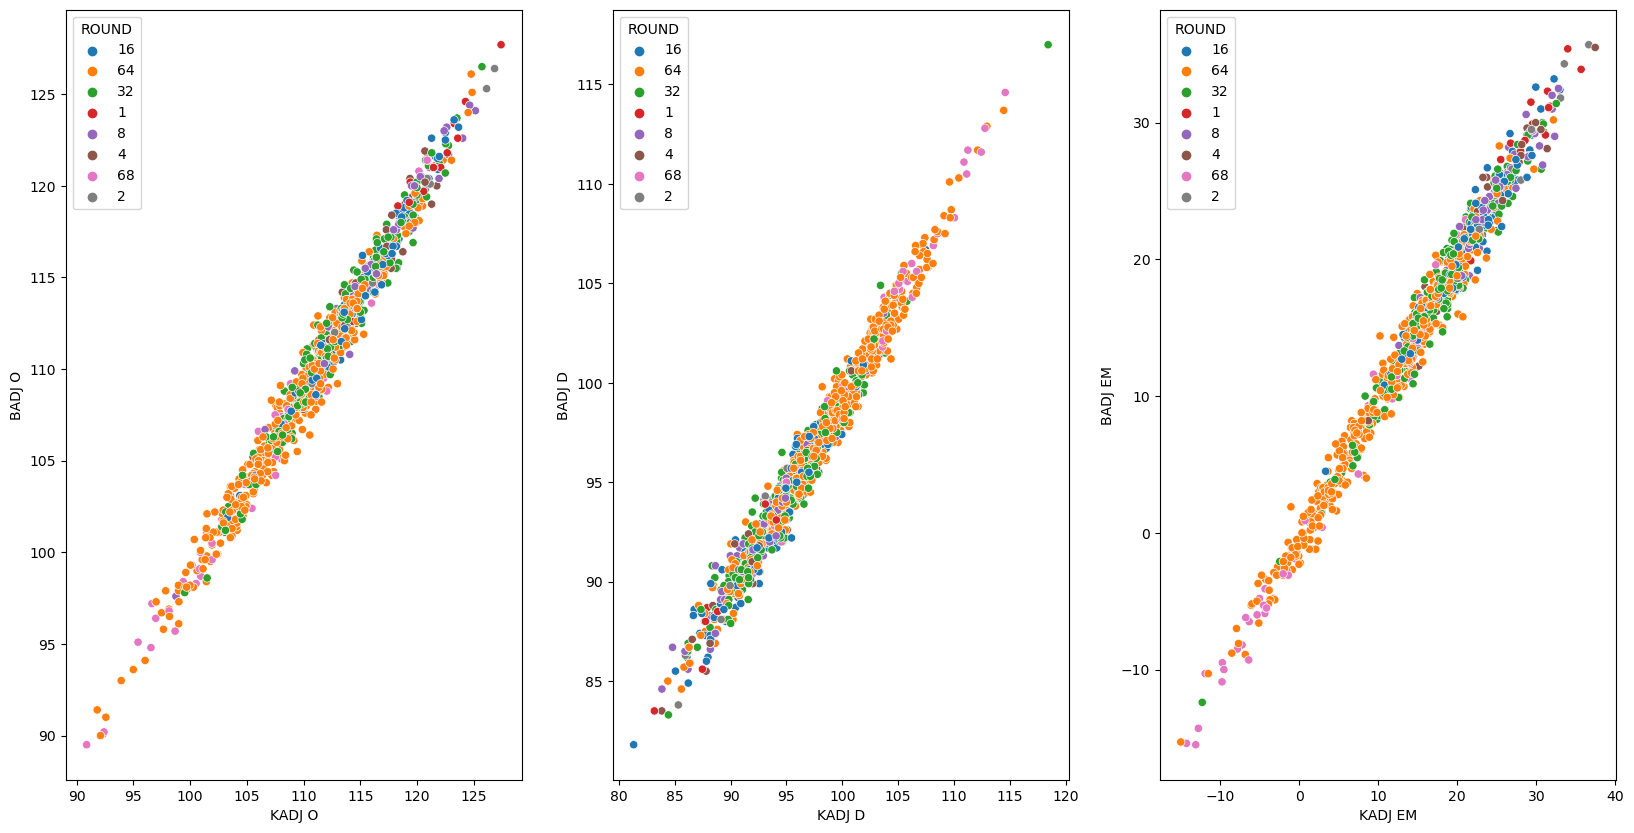

In [7]:
# Compare KenPom stats with BartTorvik stats

fig, axs = plt.subplots(1,3,figsize=(20,10))
sns.scatterplot(data, x='KADJ O', y='BADJ O', ax=axs[0],hue='ROUND')
sns.scatterplot(data, x='KADJ D', y='BADJ D', ax=axs[1],hue='ROUND')
sns.scatterplot(data, x='KADJ EM', y='BADJ EM', ax=axs[2],hue='ROUND')

# We see that the rankings tend to agree, but have slight differences, particularly on the high and low ends, which are most significant in
# understanding and predicting March Madness performance

c:\Users\ceero\anaconda3\envs\DS4003\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


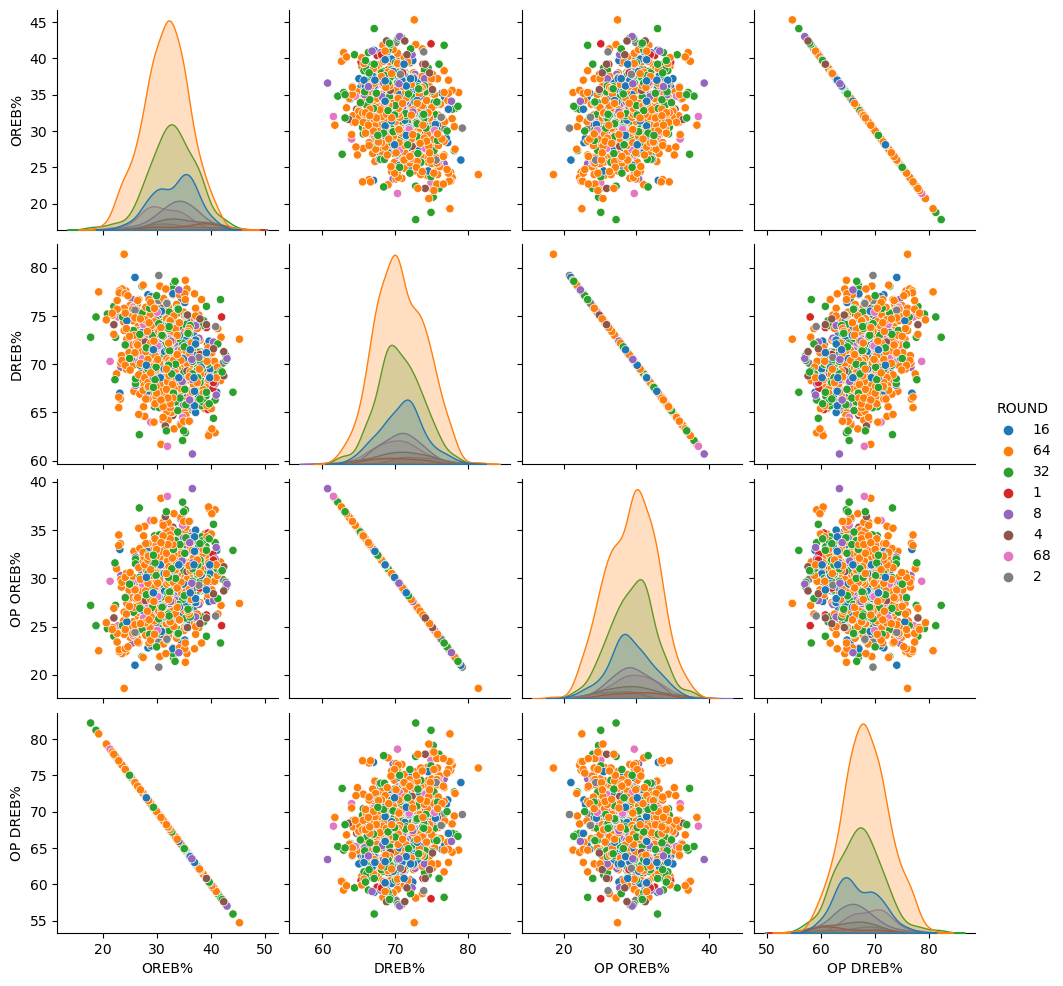

In [8]:
sns.pairplot(data[['OREB%','DREB%','OP OREB%','OP DREB%','ROUND']],hue='ROUND')
# Observe the distribution of rebounding, both offense and defense, and team vs. opposing team
# Recover the observation that OREB% + OP DREB% = DREB% + OP OREB% = 1. Thus DREB and OP OREB% tell us the same information, and needn't both
# be analyzed (corr. of -1 could throw off a multiple linear regression run on the data)

<Axes: xlabel='TOV%', ylabel='TOV%D'>

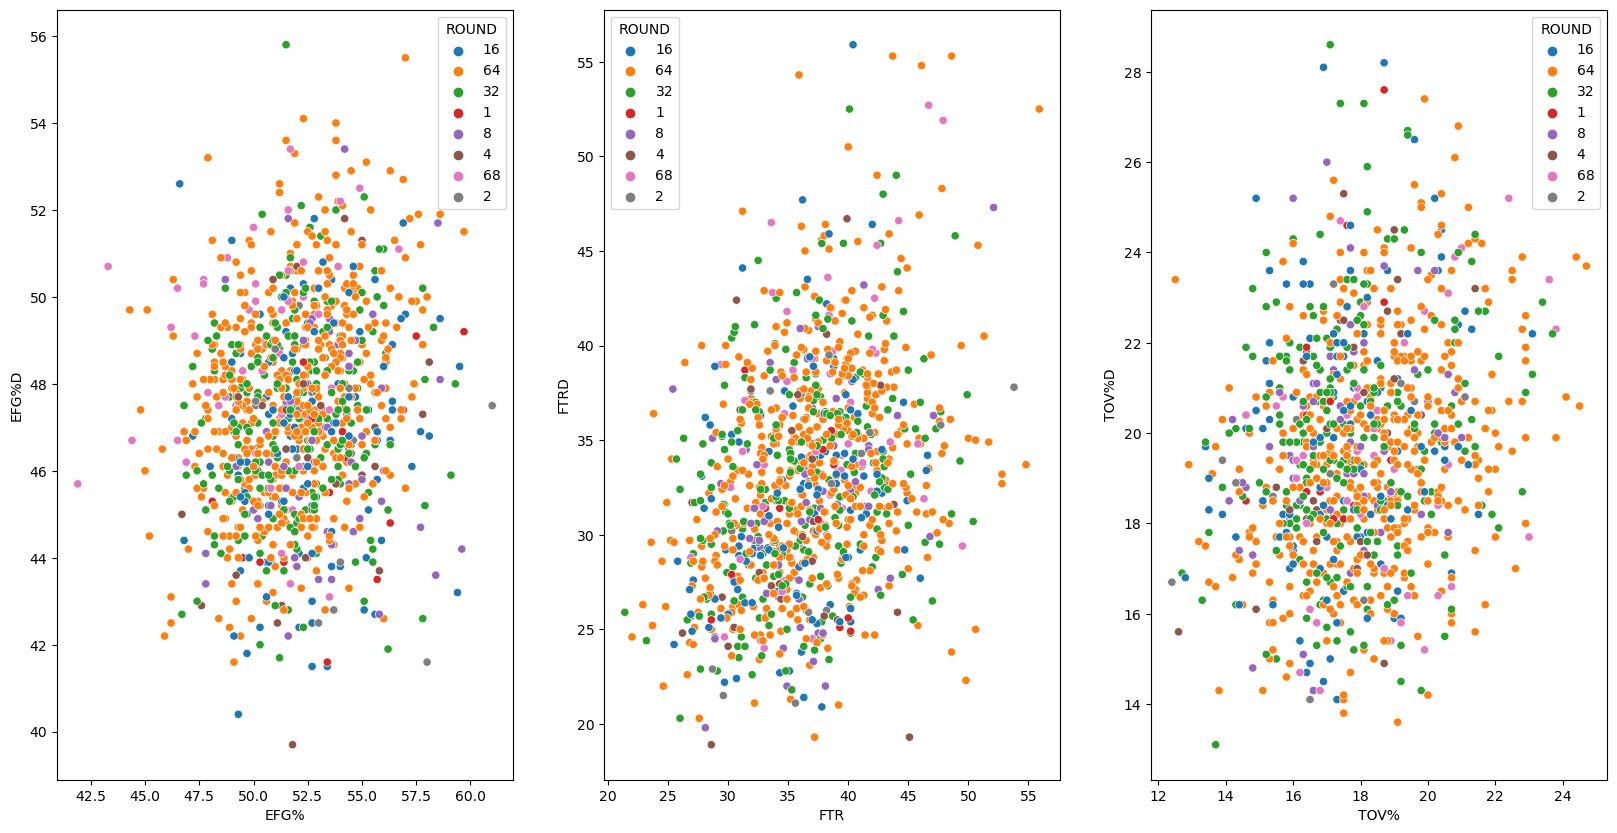

In [9]:
fig, axs = plt.subplots(1,3,figsize=(20,10))
sns.scatterplot(data, x='EFG%', y='EFG%D', ax=axs[0],hue='ROUND')
sns.scatterplot(data, x='FTR', y='FTRD', ax=axs[1],hue='ROUND')
sns.scatterplot(data, x='TOV%', y='TOV%D', ax=axs[2],hue='ROUND')

# This is a lot of data to parse
# The first graph shows us that there is a lot of central noise, but teams that beat the noise on the good side (bottom left for higher EFG%
# and lower EFG%D) tend to do well, almost always making at least the round of 16, and teams that don't almost always get stuck up to 32
# The second graph shows a lot less information. There are many more teams high on the FTRD, where they don't want to be, yet multiple have
# performed well. Here, successful teams come in the general quadrant of the bottom left, a bit surprisingly, as we'd expect teams with better
# FTR to do better, but few teams with a FTR above 42 see much success in the tournament.
# The last graph is the most different from the other two. Here, there is the most scatter of performance across the statistical metrics,
# with the exception that almost every outlier in every direction performs poorly, with a very rare exception of a winner with a high TOV%D.

In [10]:
data[['EFG%', 'EFG%D', 'FTR', 'FTRD', 'TOV%', 'TOV%D', 'OREB%', 'DREB%', 'OP OREB%', 'OP DREB%']].corr()

# We get interesting data on the correlation values of all the 'Four Factors' stats. This once again shows us that the REB% stats have only 
# two unique values to show. We glean from this that many of the big four statistics are negatively correlated to each other, meaning that 
# most teams successful in one are less successful in others. For example, EFG% is negatively correlated with TOV%, OREB%, and FTR. We can
# determine that there are two common ways people use the four factors to achieve  success, either focusing on an efficient and clean
# performance (EFG%, TOV%, FTRD, DREB%), or a more explosive, high volume performance (FTR, TOV%D, OREB%, EFG%D). That is to say, either teams
# focus on more efficient shooting, less turnovers, less fouling (in terms of opponent free throws), and more defensive rebounds, while others
# tend to get to the line more often, force more turnovers, get more offensives rebounds, and throw off their opponents on the defensive end

,EFG%,EFG%D,FTR,FTRD,TOV%,TOV%D,OREB%,DREB%,OP OREB%,OP DREB%
EFG%,1.000000,0.162550,-0.204079,-0.323241,-0.244027,-0.262757,-0.287866,0.276373,-0.276373,0.287866
EFG%D,0.162550,1.000000,-0.119119,-0.015698,-0.209805,-0.040102,-0.303341,0.038172,-0.038172,0.303341
FTR,-0.204079,-0.119119,1.000000,0.333265,0.354069,0.077081,0.316126,-0.259367,0.259367,-0.316126
FTRD,-0.323241,-0.015698,0.333265,1.000000,0.264933,0.438043,0.210175,-0.301289,0.301289,-0.210175
TOV%,-0.244027,-0.209805,0.354069,0.264933,1.000000,0.226098,0.378062,-0.259741,0.259741,-0.378062
TOV%D,-0.262757,-0.040102,0.077081,0.438043,0.226098,1.000000,0.231729,-0.460673,0.460673,-0.231729
OREB%,-0.287866,-0.303341,0.316126,0.210175,0.378062,0.231729,1.000000,-0.273580,0.273580,-1.000000
DREB%,0.276373,0.038172,-0.259367,-0.301289,-0.259741,-0.460673,-0.273580,1.000000,-1.000000,0.273580
OP OREB%,-0.276373,-0.038172,0.259367,0.301289,0.259741,0.460673,0.273580,-1.000000,1.000000,-0.273580
OP DREB%,0.287866,0.303341,-0.316126,-0.210175,-0.378062,-0.231729,-1.000000,0.273580,-0.273580,1.000000


c:\Users\ceero\anaconda3\envs\DS4003\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


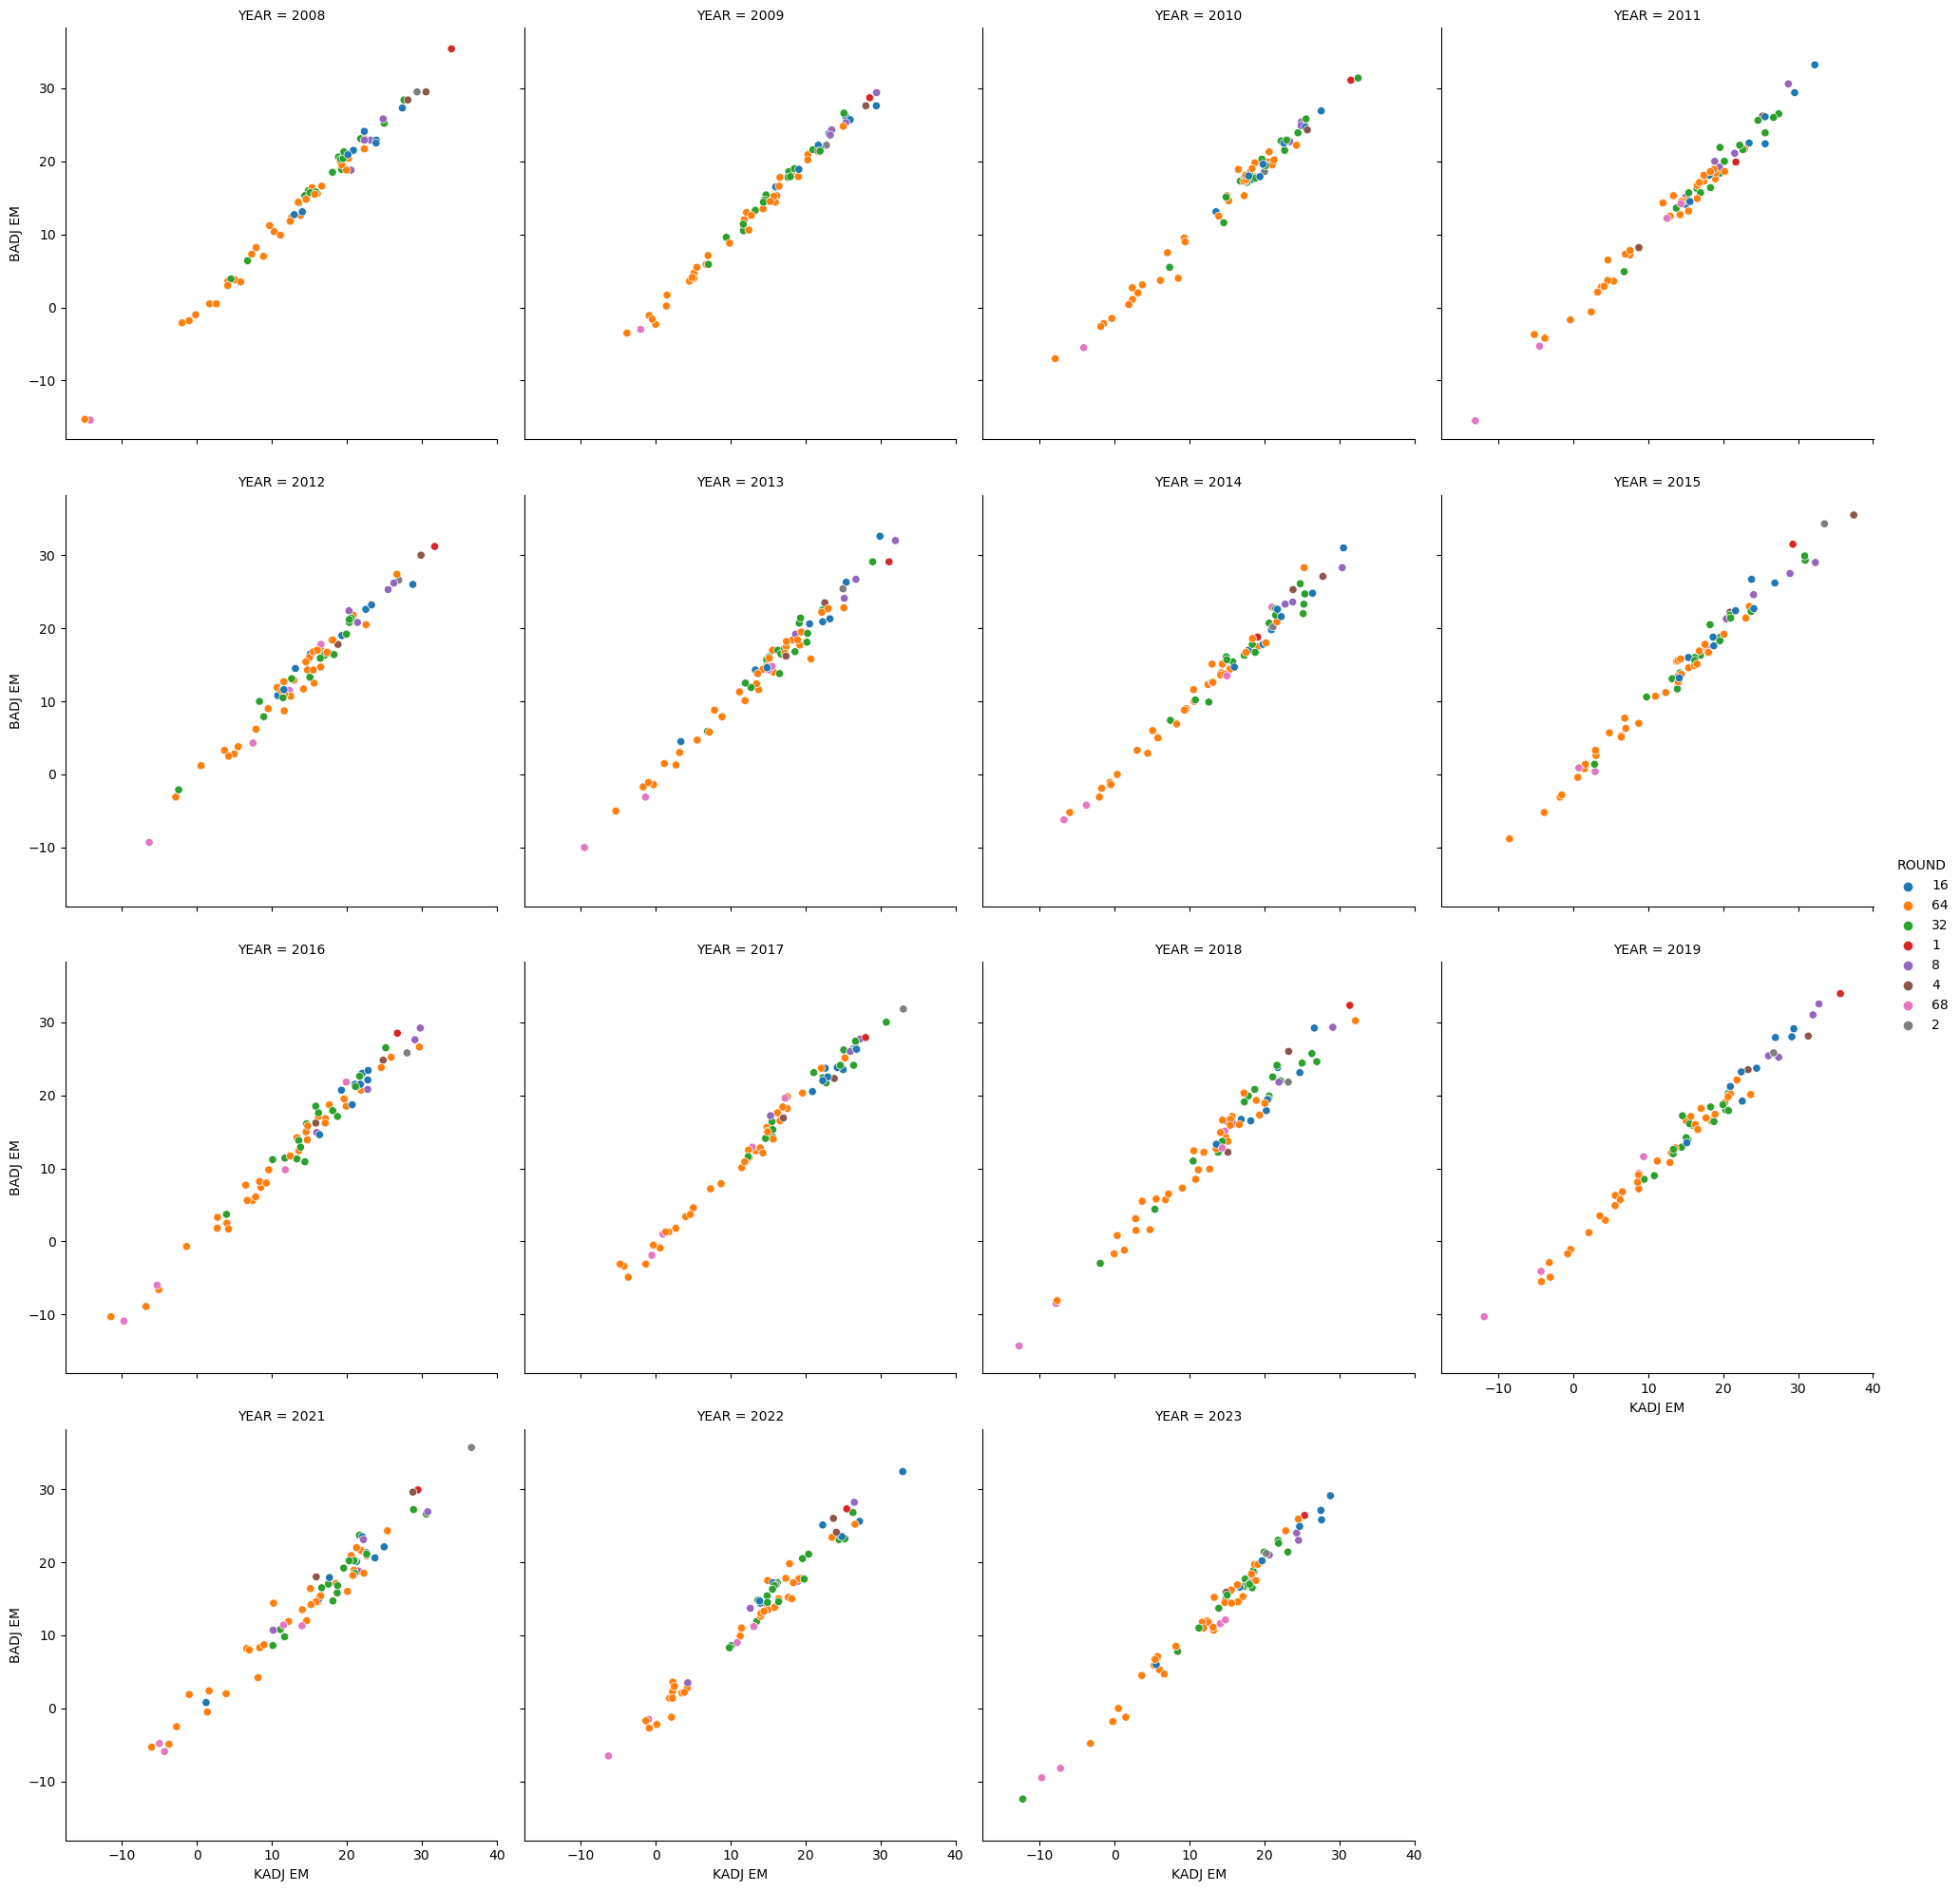

In [11]:
sns.relplot(data,x='KADJ EM',y='BADJ EM',col='YEAR',hue='ROUND',kind='scatter',col_wrap=4)
# Observe the distribution of the efficiency of teams (x and y axes) and their performance in the tournament (hue) over time
# We see that some years have teams that stand out as exceptionally strong or weak, while others have more balanced teams, which ultimately
# correlates to end performance, moreso on the weak side (almost always round of 64 or 68) than the strong side (which tends to vary between
# Sweet 16 all the way to champions)

c:\Users\ceero\anaconda3\envs\DS4003\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


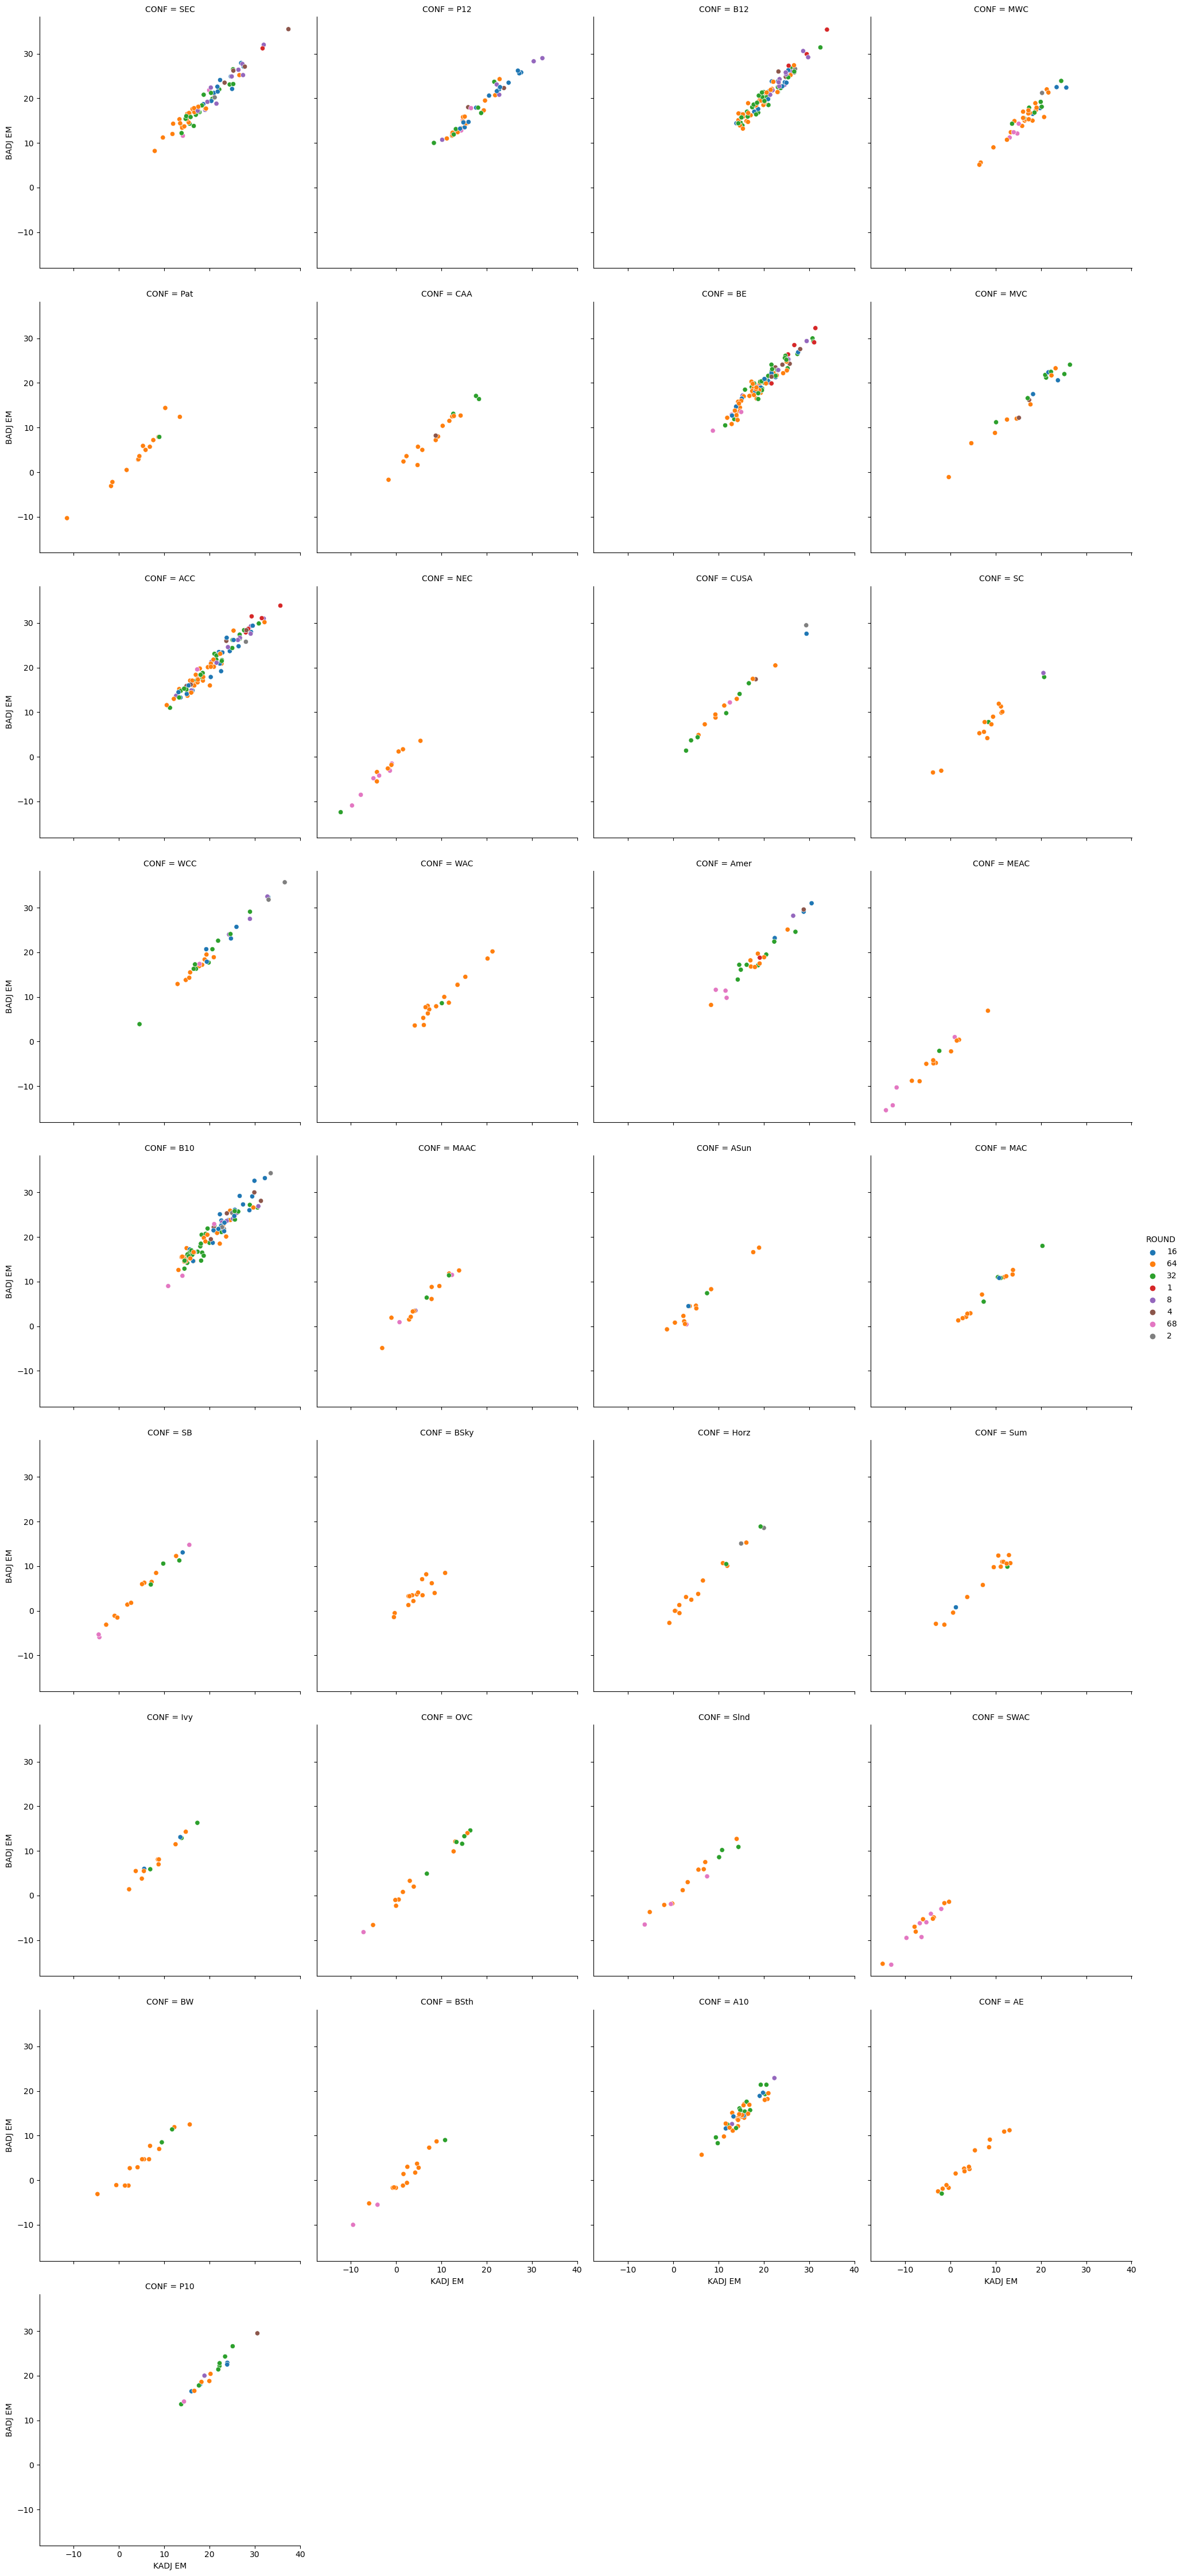

In [12]:
sns.relplot(data,x='KADJ EM',y='BADJ EM',col='CONF',hue='ROUND',kind='scatter',col_wrap=4) 
# Observe Conference strength (x and y axes) and performance (hue of round made)
# Lets us see that some conferences (like the SEC, BE/Big East, B12/Big 12, etc. are stronger than others like the NEC or WAC)
# There is a divide of two types of conferences, some that are only in the upper half of both BADJ EM and KADJ EM, with varying performances
# But overall, numerous good ones. At the same time, some conferences are almost only in the lower half of BADJ EM and KADJ EM, who almost
# exclusively exit in the first two rounds. If teams manage to beat these typical (like in the CAA), these teams can end up doing quite well

Data Dictionary:

YEAR: Ending year of the team's season. <br>
CONF: Conference Name. <br>
TEAM NO: Unique identifier for the team and the year they played in.<br>
TEAM: Division I college basketball team name. <br>
SEED: Preliminary ranking for the March Madness tournament.<br>
ROUND: Farthest round the team made it in the tournament. 68 = First Four, 64 = Round of 64, 32 = Round of 32, 16 = Sweet 16, 8 = Elite Eight, 4 = Final Four, 2 = Finals , 1 = Champion.<br>
KADJ O: KenPom estimate of how many points a team would score against the average Division I basketball offense over the course of 100 possessions.<br>
KADJ D: KenPom estimate of how many points a team would allow against the average Division I basketball defense over the course of 100 possessions.<br>
KADJ EM: Kenpom estimate of how many points a team would outscore the average Division I basketball team by over the course of 100 possessions.<br>
BADJ O: BartTorvik estimate of how many points a team would score against the average Division I basketball offense over the course of 100 possessions.<br>
BADJ D: BartTorvik estimate of how many points a team would allow against the average Division I basketball defense over the course of 100 possessions.<br>
BADJ EM: BartTorvik estimate of how many points a team would outscore the average Division I basketball team by over the course of 100 possessions.<br>
EFG%: Measures field goal percentage adjusting for made three-point shots being 1.5 times more valuable than made two-point shots.<br>
EFG%D: Measures field goal percentage adjusting for made three-point shots being 1.5 times more valuable than made two-point shots for the opposing team.<br>
FTR: The ratio of free throw attempts to field goal attempts.<br>
FTRD: The ratio of free throw attempts to field goal attempts a team allows.<br>
TOV%: The percent of turnovers committed by a team.<br>
TOV%D: The percent of turnovers forced by a team.<br>
OREB%: The percent of rebounds on the offensive end that a team grabs out of all rebounding opportunities possible.<br>
DREB%: The percent of rebounds on the defensive end that a team grabs out of all rebounding opportunities possible.<br>
OP OREB%: The ratio of the opposing team's offensive rebounds to a team's defensive rebounds.<br>
OP DREB%: The ratio of the opposing team's defensive rebounds to a team's offensive rebounds.

UI Components:

For UI components, the first and most important item would be a menu. There are different types of information a particular viewer would want to look at, such as data from a specific year, trends across years, and specific team performance. A menu would allow users to go to a page that has the specific type of information they are looking for.
Another helpful UI component would be to have icons for points in smaller graphs that are the logos of the teams, so that it can more easisly be viewed and understood as to which teams are at any given point on a scatter plot, for example.
Grids are a very powerful UI component that I would like to use. When drawing comparisons between graphs of different stats (like I did with the EFG%, TOV% and FTR), having the graphs in a grid that is easy to compare across would be good to help users draw comparisons about different graphs trying to show similar stories.
I will likely have many graphs and other similar visualizations, which may take a bit to load due to the amount of data I'm generating (for example, it took 30 seconds to compile all of the conference visualizations). I would include a progress indicator, likely a spinning wheel, to indicate that the process is still running and nearing completion.
I plan on including a lot of different methods to specify selections of what the users want visualized. Many of these will be dropdowns, selecting from items such as conference, year or team. I would also use a few radios, particularly one to switch between KenPom and BartTorvik data, depending on which the user prefers. 

Data visualizations:

I've already done some of the legwork for the visualizations I would include. The first visualization I would do is a visualization of Adjusted Offensive vs. Defensive Efficiency, colored by postseason results. I would allow users to filter by conference, team, and year. I also would like to make this able to be played over time, so that even more could be captured from the single visualization.
The next visualization I would want is comparing the four factors (Shooting/EFG%, Turnovers/TOV%, Free Throws/FTR, and Rebounding/OREB/DREB). I would let the user select from a dropdown which statistic they want on each axes, and in a radio selection if they want the offensive statistic or the defensive statistic. I would also let them choose to color by postseason results, or to show team logos instead, and let them filter by conference and year.
Another visualization I would do is a graph to visualize each seed's outcome. This would likely be either a line graph or a bar chart, but I'm still actively looking for a visualization that I like more (perhaps something similar to a Sankey Graph). I would let users filter based on conference, but not year.
The reason I don't want users to filter by year is because I would like, as my fourth visualization, to have users be able to view the actual bracket for any given year. I would let users pick a year from a dropdown, and the bracket would populate with the teams that played in each, and the ultimate tournament winner. 

In [13]:
# data.to_csv('data.csv') # save the data to a csv